In [47]:
%%capture
%run FeatureEngineering.ipynb

import missingno as msno
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder


In [48]:
# Checking missing values
missing = train_df.isnull().sum()[train_df.isnull().sum() > 0].to_frame().rename(columns={0:"No. of Missing Values"})
missing["% of Missing Values"] = round(train_df.isnull().sum()[train_df.isnull().sum() > 0]*100/len(train_df),2)
missing

,No. of Missing Values,% of Missing Values
HomePlanet,201,2.31
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16


<Axes: >

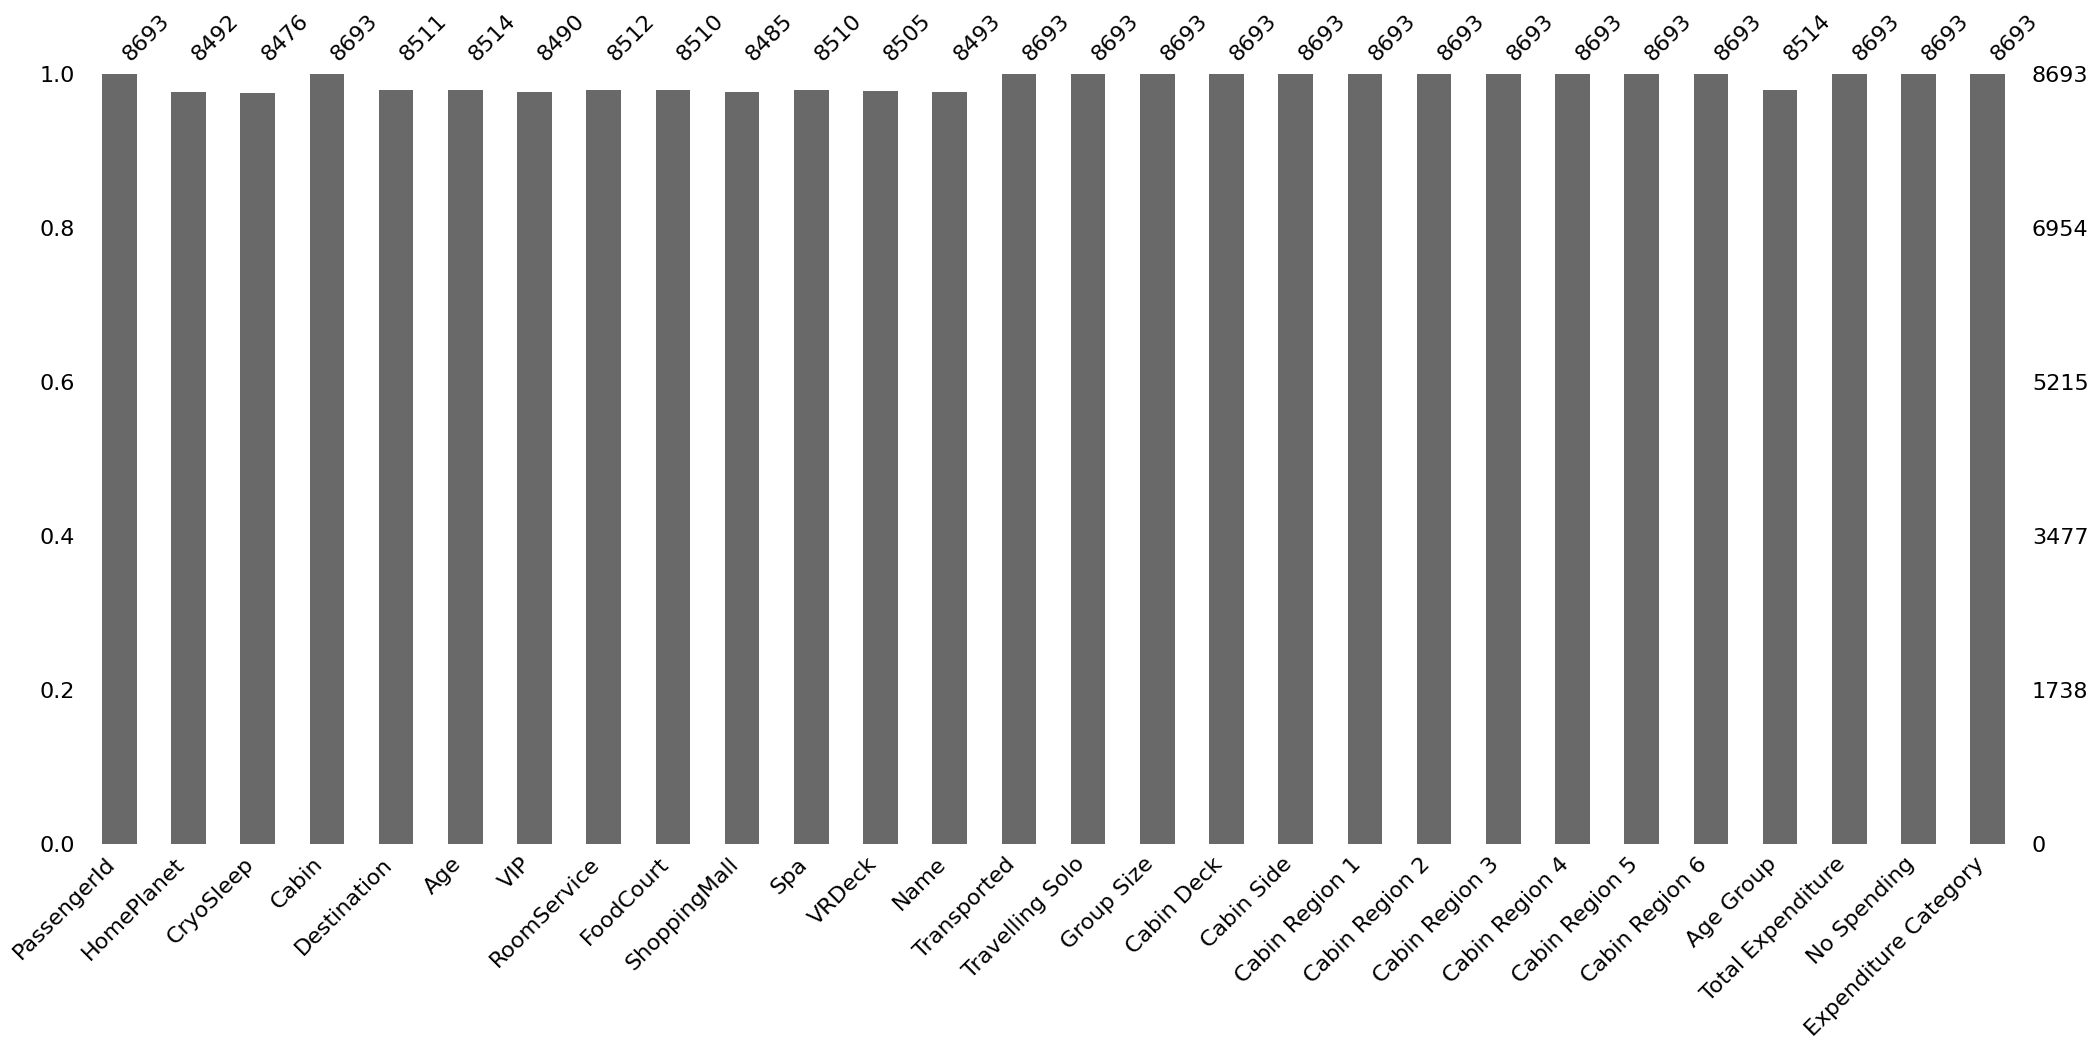

In [49]:
# Visualizing missing values
msno.bar(train_df)


In [50]:
# Handling missing values
cat_cols = train_df.select_dtypes(include=["object", "bool"]).columns.tolist()
cat_cols.remove("Transported")
num_cols = train_df.select_dtypes(include=["int", "float"]).columns.tolist()

In [51]:
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Travelling Solo', 'Cabin Deck', 'Cabin Side', 'Cabin Region 1', 'Cabin Region 2', 'Cabin Region 3', 'Cabin Region 4', 'Cabin Region 5', 'Cabin Region 6', 'Age Group', 'No Spending', 'Expenditure Category']
Numerical columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group Size', 'Total Expenditure']


In [52]:
# Using Simple Imputer Library to fill missing values
imputer1 = SimpleImputer(strategy="most_frequent")
imputer2 = SimpleImputer(strategy="median")

In [53]:
def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [54]:
fill_missingno(train_df)
fill_missingno(test_df)

In [55]:
print("Missing numbers left in train_df is:",train_df.isnull().sum().sum())
print("Missing numbers left in test_df is:",test_df.isnull().sum().sum())

Missing numbers left in train_df is: 0
Missing numbers left in test_df is: 0


In [56]:
# Checking duplicity data
print("Duplicate values in training data is: ",train_df.duplicated().sum())
print("Duplicate values in testing data is: ",test_df.duplicated().sum())

Duplicate values in training data is:  0
Duplicate values in testing data is:  0


In [57]:
# Checking Cardinality of Categorical Features
print("Cardinality of features in numerical data is:")
print(train_df.select_dtypes(include=["object"]).nunique())
print("\nCardinality of features in categorical data is:")
print(test_df.select_dtypes(include=["object"]).nunique())


Cardinality of features in numerical data is:
PassengerId             8693
HomePlanet                 3
CryoSleep                  2
Cabin                   6561
Destination                3
VIP                        2
Name                    8473
Travelling Solo            2
Cabin Deck                 8
Cabin Side                 2
Cabin Region 1             2
Cabin Region 2             2
Cabin Region 3             2
Cabin Region 4             2
Cabin Region 5             2
Cabin Region 6             2
Age Group                  3
No Spending                2
Expenditure Category       4
dtype: int64

Cardinality of features in categorical data is:
PassengerId             4277
HomePlanet                 3
CryoSleep                  2
Cabin                   3266
Destination                3
VIP                        2
Name                    4176
Travelling Solo            2
Cabin Deck                 8
Cabin Side                 2
Cabin Region 1             2
Cabin Region 2        

### ⚠ Observations
We have done all feature engineering now we can drop features which have high cardinality. So we can drop passengerId, Cabin , Name , Group and Surname features.

In [58]:
# Extracting passengerId from test data because we need this for submitting our predictions on kaggle.
pass_df = test_df[["PassengerId"]]

In [59]:
cols = ["PassengerId","Cabin","Name"]
train_df.drop(columns=cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

In [60]:
# Gathering Statistical Information of Numerical Features.
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Group Size,8693.0,2.035546,1.596347,1.0,1.0,1.0,3.0,8.0
Total Expenditure,8693.0,1440.866329,2803.045694,0.0,0.0,716.0,1441.0,35987.0


### ⚠ Observations
* We can observe that in RoomService, FoodCourt, ShoppingMall, Spa & VRDeck more than 50 percentile of data are equal to 0. And when we did EDA on this features all of them were having right skewed distribution, so we can simply say there is a presence of large amount of outliers in these features. 
To correct this, we can tranform these features to normal distribution using Log Transformation in order to have better understanding while finding patterns


In [61]:
# Applying log transformation on Expenditure Features
cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Total Expenditure"]

for val in cols:
    train_df[val] = np.log(1 + train_df[val])
    test_df[val] = np.log(1 + test_df[val])

/tmp/ipykernel_6120/3793937967.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[val], color="green")
/tmp/ipykernel_6120/3793937967.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[val], color="green")
/tmp/ipykernel_6120/3793937967.py:5: UserWarning: 

`distplot` is a de

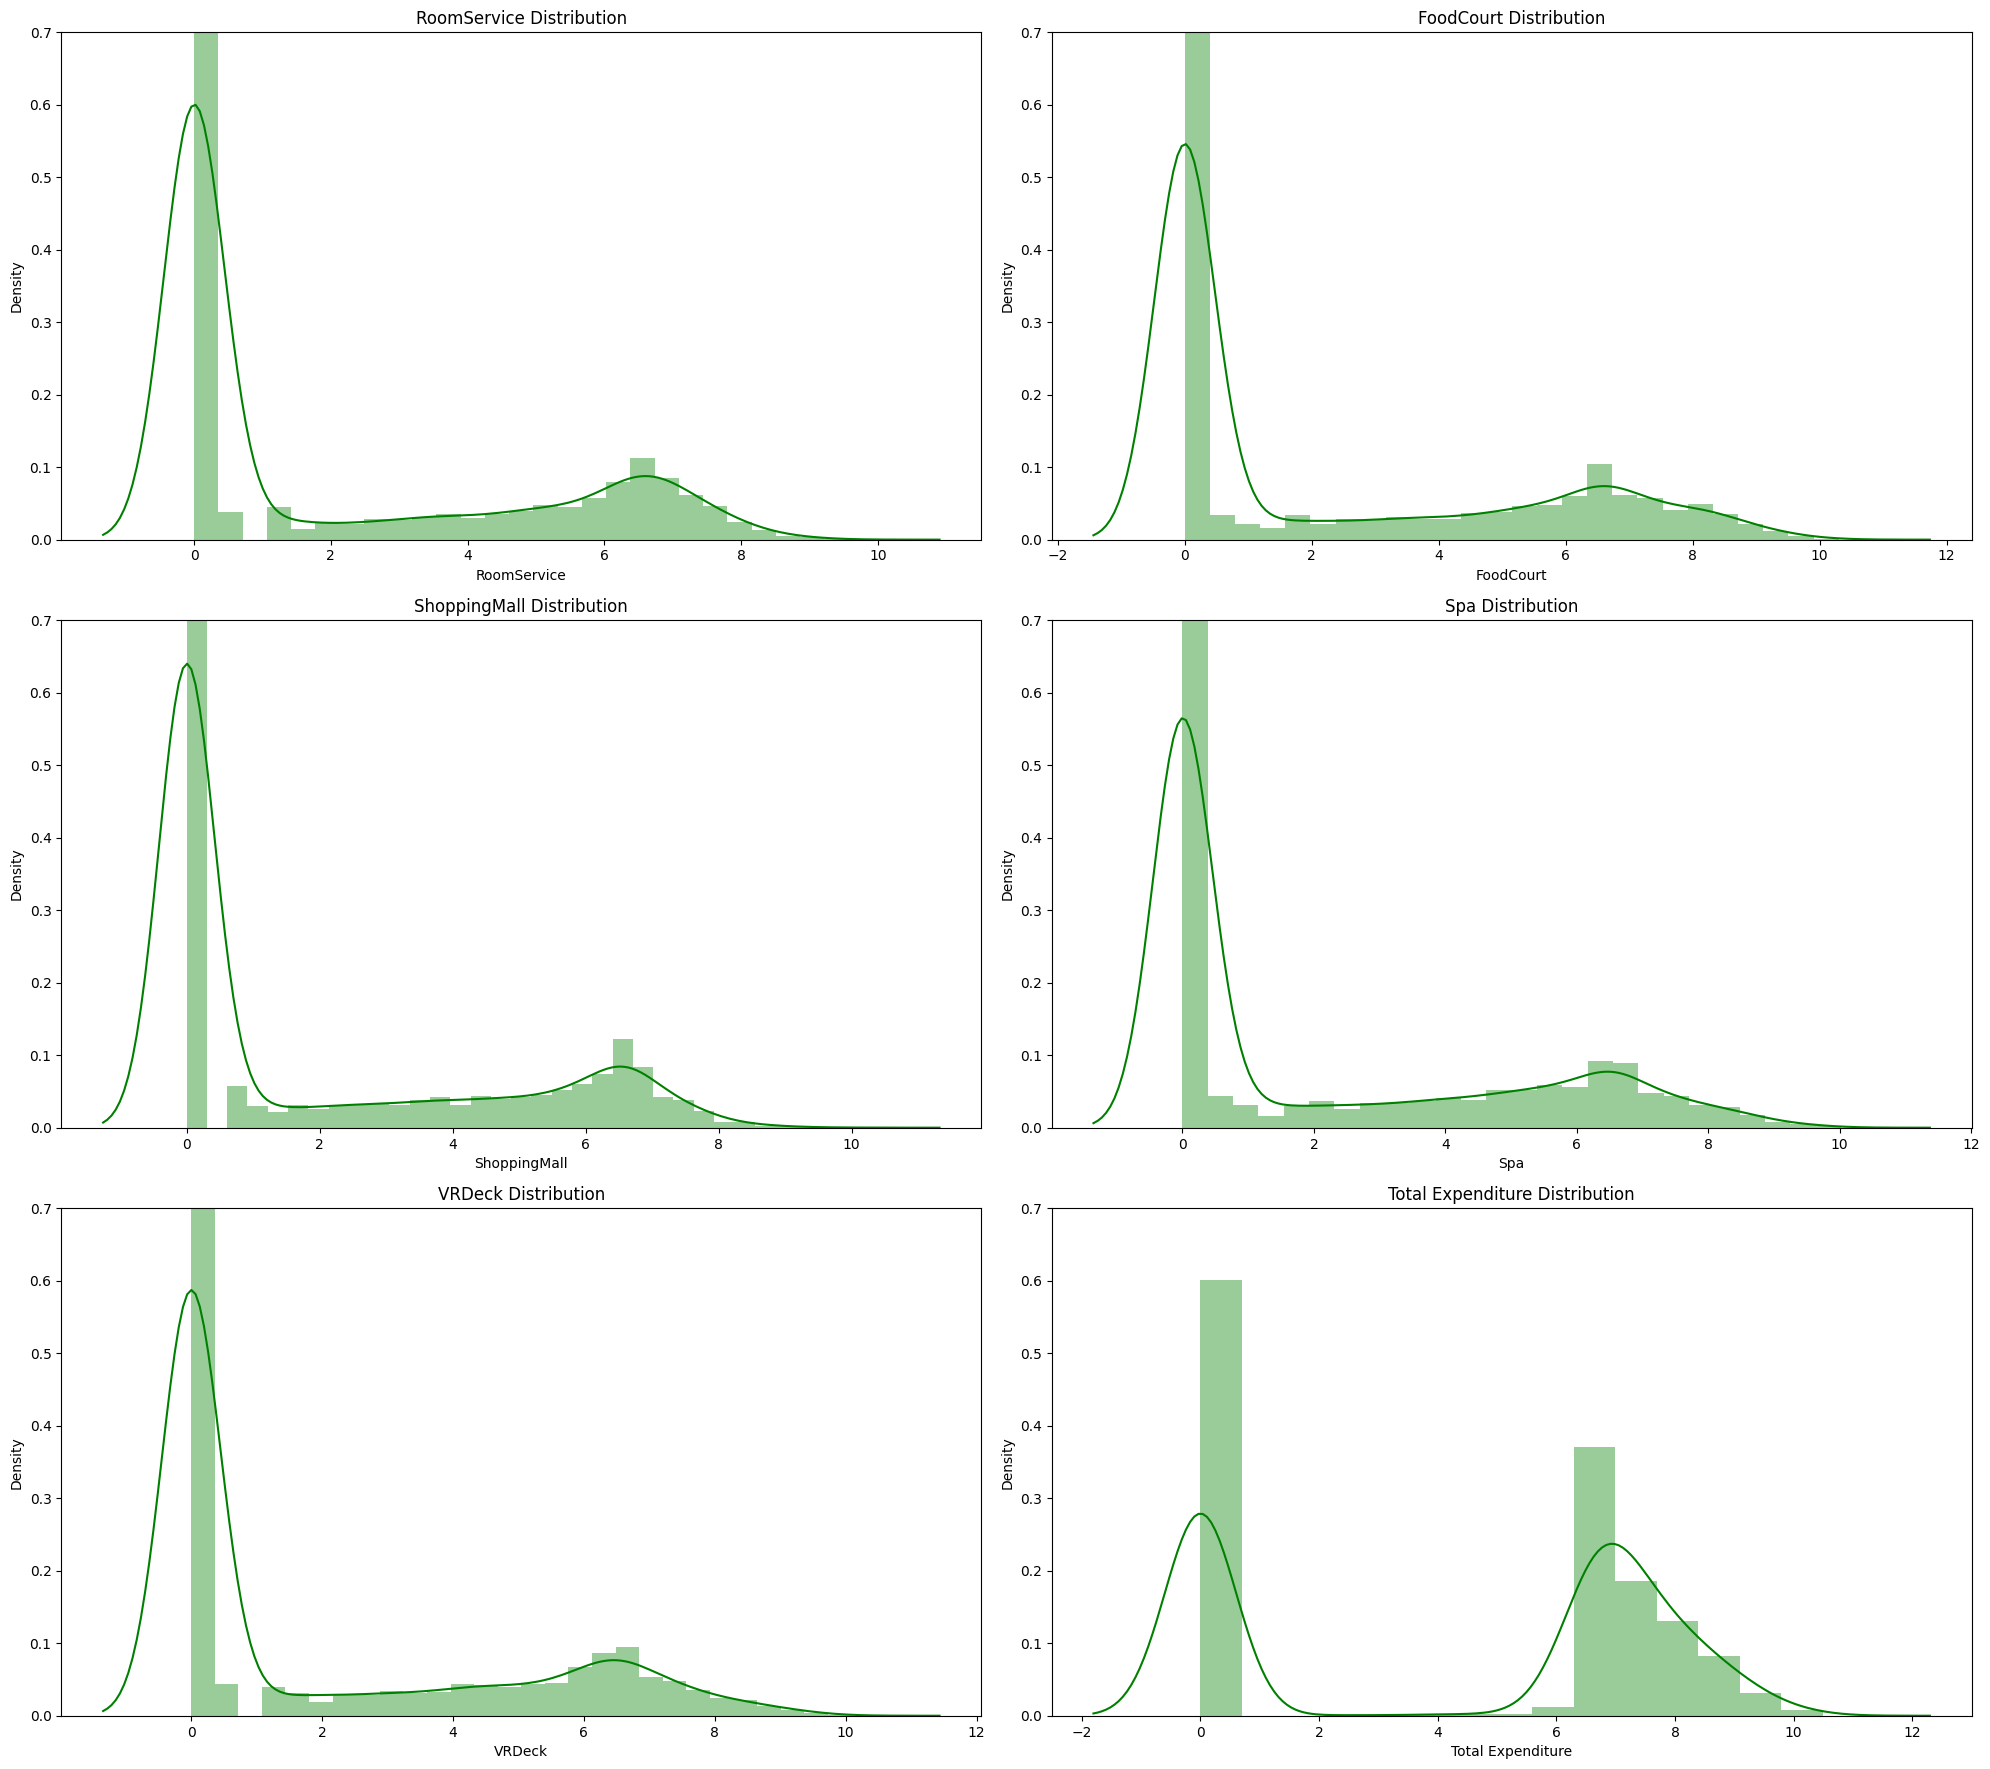

In [62]:
# Visualizing these features after log transformation
plt.figure(figsize=(20,35))
for i, val in enumerate(cols):
    plt.subplot(6, 2, i + 1)
    sns.distplot(train_df[val], color="green")
    plt.ylim(0,0.7)
    plt.title(f"{val} Distribution")
    plt.tight_layout()

In [63]:
# Checking types of features
train_df.dtypes

HomePlanet               object
CryoSleep                object
Destination              object
Age                     float64
VIP                      object
RoomService             float64
FoodCourt               float64
ShoppingMall            float64
Spa                     float64
VRDeck                  float64
Transported                bool
Travelling Solo          object
Group Size              float64
Cabin Deck               object
Cabin Side               object
Cabin Region 1           object
Cabin Region 2           object
Cabin Region 3           object
Cabin Region 4           object
Cabin Region 5           object
Cabin Region 6           object
Age Group                object
Total Expenditure       float64
No Spending              object
Expenditure Category     object
dtype: object

### ⚠ Observations
CryoSleep , VIP, Travelling_Solo, No Spending, Cabin_Region1, Cabin_Region2, Cabin_Region3, Cabin_Region4, Cabin_Region5, Cabin_Region6 features contains boolean values so we have to change there data-type which will be benefical while encoding our categorical features.

In [64]:
# Changing Data-Type to Boolean
cols = ["CryoSleep","VIP","Travelling Solo","No Spending","Cabin Region 1","Cabin Region 2","Cabin Region 3","Cabin Region 4","Cabin Region 5","Cabin Region 6"]
train_df[cols] = train_df[cols].astype(bool)
test_df[cols] = test_df[cols].astype(bool)

In [65]:
# We will do One Hot Encoding for nominal categorical features, and Label Encoding for ordinal categorical features
nominal_cat_cols = ["HomePlanet","Destination"]
ordinal_cat_cols = ["CryoSleep","VIP","Travelling Solo","Cabin Deck","Cabin Side","Cabin Region 1","Cabin Region2",
                    "Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6","Age Group","No Spending",
                    "Expenditure Category"]

In [66]:
# Label 
enc = LabelEncoder()


In [68]:
train_df[ordinal_cat_cols] = train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols] = test_df[ordinal_cat_cols].apply(enc.fit_transform)

KeyError: "['Cabin Region2', 'Cabin_Region3', 'Cabin_Region4', 'Cabin_Region5', 'Cabin_Region6'] not in index"